Download and plot the radio dynamic spectrum from Solar Orbiter

In [15]:
import warnings
warnings.filterwarnings('ignore')

import os
import sunpy_soar
from sunpy.net import Fido, attrs as a
from radiospectra.spectrogram import Spectrogram

from matplotlib.dates import DateFormatter
myFmt_time = DateFormatter('%H:%M')

import numpy as np
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rcParams['date.epoch'] = '1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.format'] = 'png'
plt.rcParams['savefig.facecolor'] = 'white'

In [44]:
query = Fido.search(a.Time('2022-12-01', '2022-12-02'),
                    a.Instrument('RPW'),
                    a.Level(2),
                    a.soar.Product('RPW-HFR-SURV')) # RPW-HFR-SURV, RPW-TNR-SURV
display(query)

Instrument,Data product,Level,Start time,End time,Data item ID,Filename,Filesize,SOOP Name
,,,,,,,Mbyte,
str3,str12,str2,str23,str23,str29,str37,float64,object
RPW,rpw-hfr-surv,L2,2022-12-01 00:00:00.000,2022-12-02 00:00:00.000,solo_L2_rpw-hfr-surv_20221201,solo_L2_rpw-hfr-surv_20221201_V02.cdf,141.459,None
RPW,rpw-hfr-surv,L2,2022-12-02 00:00:00.000,2022-12-03 00:00:00.000,solo_L2_rpw-hfr-surv_20221202,solo_L2_rpw-hfr-surv_20221202_V02.cdf,90.685,None


In [45]:
downloaded = Fido.fetch(query[0], path='./{instrument}/{file}')

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

solo_L2_rpw-hfr-surv_20221201_V02.cdf:   0%|          | 0.00/141M [00:00<?, ?B/s]

solo_L2_rpw-hfr-surv_20221202_V02.cdf:   0%|          | 0.00/90.7M [00:00<?, ?B/s]

In [46]:
downloaded

['RPW/solo_L2_rpw-hfr-surv_20221201_V02.cdf', 'RPW/solo_L2_rpw-hfr-surv_20221202_V02.cdf']

In [47]:
spec = Spectrogram(downloaded[0])

In [48]:
spec[0]

<RPWSpectrogram SOLO, RPW, RPW-AGC1 375.0 kHz - 16375.0 kHz, 2022-12-01T00:03:27.107 to 2022-12-01T23:58:24.893>

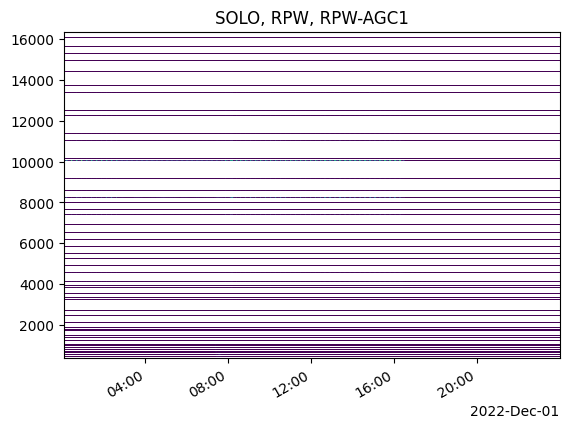

In [51]:
spec[0].plot()

In [54]:
[x for x in dir(spec[0]) if not x.startswith('_')]

['data',
 'detector',
 'end_time',
 'frequencies',
 'instrument',
 'is_datasource_for',
 'meta',
 'observatory',
 'plot',
 'plotim',
 'start_time',
 'times',
 'wavelength']

In [22]:
plt.figure(figsize=[12,7])
plt.pcolormesh(tt1, np.array(spec[0].frequencies), spec[0].T, 
              vmin=(np.mean(spec[0].data)-2 * np.std(spec[0].data)), 
              vmax=(np.mean(spec[0].data)+3 * np.std(spec[0].data)))
plt.xlabel('Time')
plt.ylabel('Frequency (kHz)')
#plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.colorbar()
plt.show()

(321, 32880)

Instrument,Data product,Level,Start time,End time,Data item ID,Filename,Filesize,SOOP Name
,,,,,,,Mbyte,
str3,str12,str2,str23,str23,str29,str37,float64,object
RPW,rpw-hfr-surv,L2,2022-12-01 00:00:00.000,2022-12-02 00:00:00.000,solo_L2_rpw-hfr-surv_20221201,solo_L2_rpw-hfr-surv_20221201_V02.cdf,141.459,None
RPW,rpw-hfr-surv,L2,2022-12-02 00:00:00.000,2022-12-03 00:00:00.000,solo_L2_rpw-hfr-surv_20221202,solo_L2_rpw-hfr-surv_20221202_V02.cdf,90.685,None


Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

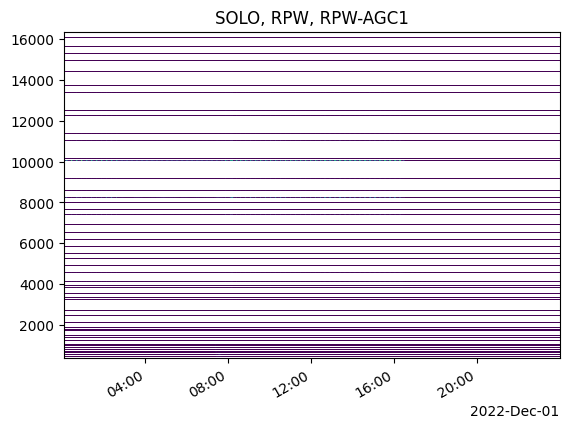

In [1]:
# Minimum example
import sunpy_soar
from sunpy.net import Fido, attrs as a
from radiospectra.spectrogram import Spectrogram

query = Fido.search(a.Time('2022-12-01', '2022-12-02'),
                    a.Instrument('RPW'),
                    a.Level(2),
                    a.soar.Product('RPW-HFR-SURV')) # RPW-HFR-SURV, RPW-TNR-SURV
display(query)
downloaded = Fido.fetch(query[0], path='./{instrument}/{file}')
spec = Spectrogram(downloaded[0])
spec[0].plot()

In [58]:
[(i, x) for i, x in enumerate(dir(a.soar.Product)) if x.startswith('rpw')]

[(147, 'rpw_bia_density'),
 (148, 'rpw_bia_density_10_seconds'),
 (149, 'rpw_bia_density_10_seconds_cdag'),
 (150, 'rpw_bia_density_cdag'),
 (151, 'rpw_bia_efield'),
 (152, 'rpw_bia_efield_10_seconds'),
 (153, 'rpw_bia_efield_10_seconds_cdag'),
 (154, 'rpw_bia_efield_cdag'),
 (155, 'rpw_bia_scpot'),
 (156, 'rpw_bia_scpot_10_seconds'),
 (157, 'rpw_bia_scpot_10_seconds_cdag'),
 (158, 'rpw_bia_scpot_cdag'),
 (159, 'rpw_hfr_surv'),
 (160, 'rpw_lfr_surv_asm'),
 (161, 'rpw_lfr_surv_bp1'),
 (162, 'rpw_lfr_surv_bp2'),
 (163, 'rpw_lfr_surv_cwf'),
 (164, 'rpw_lfr_surv_cwf_b'),
 (165, 'rpw_lfr_surv_cwf_e'),
 (166, 'rpw_lfr_surv_cwf_e_cdag'),
 (167, 'rpw_lfr_surv_swf'),
 (168, 'rpw_lfr_surv_swf_b'),
 (169, 'rpw_lfr_surv_swf_e'),
 (170, 'rpw_lfr_surv_swf_e_cdag'),
 (171, 'rpw_sbm1'),
 (172, 'rpw_sbm2'),
 (173, 'rpw_tds_surv_hist1d'),
 (174, 'rpw_tds_surv_hist2d'),
 (175, 'rpw_tds_surv_mamp'),
 (176, 'rpw_tds_surv_rswf'),
 (177, 'rpw_tds_surv_rswf_b'),
 (178, 'rpw_tds_surv_rswf_e'),
 (179, 'rpw_tds_

In [70]:
'rpw_hfr_surv'.replace('_','-').upper()

'RPW-HFR-SURV'

In [75]:
product = 'rpw-lfr-surv-asm'

query = Fido.search(a.Time('2022-12-01', '2022-12-02'),
                    a.Instrument('RPW'),
                    #a.Level(2),
                    a.soar.Product(product)
                   )
display(query)
downloaded = Fido.fetch(query[0], path='./{instrument}/{file}')
spec = Spectrogram(downloaded[0])
spec[0].plot()

Instrument,Data product,Level,Start time,End time,Data item ID,Filename,Filesize,SOOP Name
,,,,,,,Mbyte,
str3,str16,str2,str23,str23,str33,str41,float64,object
RPW,rpw-lfr-surv-asm,L2,2022-12-01 00:00:00.000,2022-12-02 00:00:00.000,solo_L2_rpw-lfr-surv-asm_20221201,solo_L2_rpw-lfr-surv-asm_20221201_V02.cdf,8.239,None
RPW,rpw-lfr-surv-asm,L2,2022-12-02 00:00:00.000,2022-12-03 00:00:00.000,solo_L2_rpw-lfr-surv-asm_20221202,solo_L2_rpw-lfr-surv-asm_20221202_V02.cdf,61.125,None


Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

ValueError: Currently radiospectra supports Level 2 HFR survey data the filesolo_L2_rpw-lfr-surv-asm_20221201_V02.cdf is ['RPW-LFR-SURV-ASM>RPW Low Frequency Receiver Average Spectral Matrices data in survey mode']

In [ ]:
# Plot all data products
data_products = [x for x in dir(a.soar.Product) if x.startswith('rpw')]

year = '2021'
month = '09'
day = '17'

for data_product in data_products:
    try:
        print(data_product)
        file_path = f'./RPW/solo_L2_{data_product}_{year}{month}{day}_V03.cdf'
        
        if not os.path.exists(file_path):
            query = Fido.search(a.Time(f'{year}-{month}-{day}', f'{year}-{month}-{int(day)+1}'),
                                a.Instrument('RPW'),
                                a.Level(2),
                                a.soar.Product(data_product.replace('_','-').upper())
                               )
            display(query)
            downloaded = Fido.fetch(query[0], path='./{instrument}/{file}')
            spec = Spectrogram(downloaded[0])
        else:
            spec = Spectrogram(file_path)
        spec[0].plot()
    except:
        print(f'{data_product} is not available!\n')

In [ ]:
year = '2020'
month = '07'
day = '01'
data_product = 'rpw_hfr_surv'
# data_product = 'rpw_tnr'
# data_product = 'rpw_tnr_fp'
# data_product = 'rpw_tnr_surv'

file_path = f'./RPW/solo_L2_{data_product}_{year}{month}{day}_V03.cdf'

if not os.path.exists(file_path):
    query = Fido.search(a.Time(f'{year}-{month}-{day}', f'{year}-{month}-{int(day)+1}'),
                        a.Instrument('RPW'),
                        a.Level(2),
                        a.soar.Product(data_product.replace('_','-').upper()))
    display(query)
    downloaded = Fido.fetch(query[0], path='./{instrument}/{file}')
    spec = Spectrogram(downloaded[0])
else:
    spec = Spectrogram(file_path)
spec.plot()

In [ ]:
year = '2020'
month = '09'
days = ['01','03','05','07','09','11','13','15','17','19','21']

data_product = 'rpw_hfr_surv'

for day in days:
    file_path = f'./RPW/solo_L2_{data_product}_{year}{month}{day}_V03.cdf'

    if not os.path.exists(file_path):
        query = Fido.search(a.Time(f'{year}-{month}-{day}', f'{year}-{month}-{int(day)+1}'),
                            a.Instrument('RPW'),
                            a.Level(2),
                            a.soar.Product(data_product.replace('_','-').upper()))
        display(query)
        downloaded = Fido.fetch(query[0], path='./{instrument}/{file}')
        spec = Spectrogram(downloaded[0])
    else:
        spec = Spectrogram(file_path)
    spec.plot()